<h1 style="text-align: center;">  Analysis of @WeRateDogs' Tweets </h1>

## Table of Content

1. <a href="#Introduction">Introduction</a>
2. <a href="#Analysis-Questions">Analysis Questions</a>
3. <a href="#Insights:">Insights</a>
4. <a href="#Visualizations">Visualizations</a>

## Introduction
<a id="optparam"></a>

> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." 
 
<p align="center">
  <img width="460" height="300" src="datasets\WeRateDogs_page.png">
</p>

> The aim of this analysis is to display my proficiency in Data Wrangling by gathering the data of WeRateDogs from multiple sources and in different file formats, assessing for quality and tidiness issues then cleaning. After wrangling, I analysed the data to understand how twitter users react to the tweets of WeRateDogs. 
>
> Data was gathered from a CSV file, by querying Twitter API and downloading a TSV file from Udacity server. These datasets were then cleaned and analysed. The wrangling steps which involves gather, assess and clean can be found [here](https://github.com/Hassanat-Awodipe/Tweet-Analysis-of-WeRateDogs/blob/main/Analysis%20of%20WeRateDogs'%20Tweet%20-%20Code.ipynb). 
>
> In this report, I will be working with the final, cleaned dataset which has the following columns:
>
>   - `tweet_id` which is a unique id for each tweet
>
>   - `timestamp` which is the time the tweet was made
>
>   - `text` contains the actual tweet and the ratings
>
>   - `rating numerator and denominator` are derived from the tweet in text column
>
>   - `name` is the name of the dog in the tweet, also gotten from the text column
>   
>   - `retweet` is the count of retweets for that tweet
>
>   - `favourite` is the count of favourites for that tweet
>
>   - `dog stage` is the stage of the dog(s) in the tweet i.e. `doggo, fluffer, puppo, pupper`. The dog stage was invented by WeRateDogs
>
>   - `shortened_url` contains the abridged link of the tweet
>
>   - `main_urls` contains the full link with the tweet-id as the endpoint
>
>   - `additional_urls` contains the additional link associated with the tweet
>
>   - `jpg_url` contains the link to the image used for the prediction
>
>   - `img_num` is the number of the image that was used for the prediction
>
>   - `p1` is the algorithm's #1 prediction for the image in the tweet
>
>   - `p1_conf` is how confident the algorithm is in its #1 prediction
>
>   - `p1_dog` is whether or not the #1 prediction is a breed of dog
>
>   - `p2` is the algorithm's second most likely prediction 
>
>   - `p2_conf` is how confident the algorithm is in its #2 prediction 
>
>   - `p2_dog` is whether or not the #2 prediction is a breed of dog, etc

In [ ]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)

In [7]:
print('There are {} rows and {} columns'.format(twitter_archive_master.shape[0], twitter_archive_master.shape[1]))

There are 2175 rows and 23 columns


> This is what the first five rows of the dataset looks like

In [3]:
twitter_archive_master = pd.read_csv(r'datasets\twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,shortened_url,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,7022,33856,NaN,https://t.co/MgUWQ76dJU,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Orange,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,5304,29360,NaN,https://t.co/0Xxu71qeIV,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090646,True,Chihuahua,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,3487,22077,NaN,https://t.co/wUnZnhtVJB,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Chihuahua,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,7234,36971,NaN,https://t.co/tD36da7qLQ,...,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Paper_towel,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,7773,35348,NaN,https://t.co/AtUZn91f7f,...,2.0,Basset,0.555712,True,English_springer,0.225770,True,Basset,0.175219,True


> And this is the first tweet in the data as it appears on twitter
<p align="center">
  <img width="460" height="400" src="datasets\tweet_example_1.jpeg">
</p>

## Analysis Questions
<a id="optparam"></a>

> I gathered insights by asking the following questions:
>
> 1. Which dog stage had the highest rating?
>
> 2. How has the interaction on WeRateDog improved over the years the data was collected?
>
> 3. What breed of dog is mostly interacted with by WeRateDog followers based on retweet and favourite count 
>
> 4. Do you think the followers agree with the ratings?

#### 1. Which dog stage had the number of highest rating?

> Because the ratings denominator are not consistent across the dataset, it is hard to conclude that a rating of  660/450 has more value than a rating of 12/10. To normalize, this I found the score for each dog. This score was calculated as numerator/denominator. Then grouping by the dog_stage and I found the mean score for each stage. Also, since the dog_stage is not normally distributed (i.e left skewed), I examined the count of the dog stage for each mean score.
>
> Total counts for each dog stage

In [30]:
# find the total counts for each dog stage
count_stage = twitter_archive_master['dog_stage'].value_counts(dropna=False)
count_stage = pd.DataFrame(count_stage).reset_index()
count_stage

,index,dog_stage
0,NaN,1832
1,pupper,225
2,doggo,77
3,puppo,25
4,floofer,10
5,"doggo, pupper",6


> By adding a score column for each dog, we can better understand the weight of the ratings. 

In [31]:
# create a column for the score
twitter_archive_master['score'] = (twitter_archive_master['rating_numerator']) / (twitter_archive_master['rating_denominator']).round(1)
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,shortened_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,score
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,7022,33856,NaN,https://t.co/MgUWQ76dJU,...,Orange,0.097049,False,Bagel,0.085851,False,Orange,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,5304,29360,NaN,https://t.co/0Xxu71qeIV,...,Chihuahua,0.323581,True,Pekinese,0.090646,True,Chihuahua,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,3487,22077,NaN,https://t.co/wUnZnhtVJB,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Chihuahua,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,7234,36971,NaN,https://t.co/tD36da7qLQ,...,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Paper_towel,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,7773,35348,NaN,https://t.co/AtUZn91f7f,...,Basset,0.555712,True,English_springer,0.225770,True,Basset,0.175219,True,1.2


> To understand the distribution of the score, we found the minimun, mean and maximum values.

In [32]:
# get the min, mean and max of the score
twitter_archive_master['score'].min(), twitter_archive_master['score'].mean(), twitter_archive_master['score'].max()

(0.0, 1.2203333333333302, 177.6)

> It is apparent that there are outlier scores. After removing the outliers, I grouped the data by dog stage then found the count of scores that are above the mean score in each dog stage. For example: in the table below, we can see that there are 286 dogs in the unidentified dog stage(NaN) that have scores above the mean.

In [33]:
# remove outliers and find the count of None dog stage above the mean score
count_None = twitter_archive_master[(twitter_archive_master['dog_stage']).isna() & (twitter_archive_master['score'] > 1.2) & 
            (twitter_archive_master['score'] < 18.2)].count()['tweet_id']                                  

# find the count of puppers above the mean score
count_pupper = twitter_archive_master[(twitter_archive_master['dog_stage'] == 'pupper') & (twitter_archive_master['score'] > 1.2)].count()['tweet_id']

#find the count of doggos above the mean score
count_doggo = twitter_archive_master[(twitter_archive_master['dog_stage'] == 'doggo') & (twitter_archive_master['score'] > 1.2)].count()['tweet_id']

# find the count of puppos above the mean score
count_puppo = twitter_archive_master[(twitter_archive_master['dog_stage'] == 'puppo') & (twitter_archive_master['score'] > 1.2)].count()['tweet_id']

# find the count of floofers above the mean score
count_floofer = twitter_archive_master[(twitter_archive_master['dog_stage'] == 'floofer') & (twitter_archive_master['score'] > 1.2)].count()['tweet_id']

# find the count of doggo, pupper above the mean score
count_dog_pup = twitter_archive_master[(twitter_archive_master['dog_stage'] == 'doggo, pupper') & (twitter_archive_master['score'] > 1.2)].count()['tweet_id']

In [36]:
# create a df for the above data
count_stage_mean = pd.Series([count_None, count_doggo, count_floofer, count_pupper, count_puppo, count_dog_pup],
                            index=[np.nan, 'doggo', 'floofer','pupper','puppo', 'doggo, pupper']) 
count_stage_mean = pd.DataFrame(count_stage_mean, columns=['count_above_mean']).reset_index()
count_stage_mean

,index,count_above_mean
0,NaN,286
1,doggo,30
2,floofer,3
3,pupper,26
4,puppo,12
5,"doggo, pupper",0


> Finally, I created a table that shows the total count of dogs in each dog stage and the count of dogs with scores above the mean. We can also see the proportion dogs with high scores. Half of the dogs identified as Puppo had scores above the mean. None of the dog(s) identified as doggo, pupper had scores above the mean.

In [37]:
# find the proportion of dog stages with scores above the mean
proportions = pd.merge(count_stage, count_stage_mean).rename(columns={'index':'dog_stage', 'dog_stage':'count_stage'})
proportions['prop_high_rating'] = (proportions['count_above_mean'] / proportions['count_stage'])
proportions = proportions.sort_values(['prop_high_rating'], ascending=False)
proportions

,dog_stage,count_stage,count_above_mean,prop_high_rating
3,puppo,25,12,0.480000
2,doggo,77,30,0.389610
4,floofer,10,3,0.300000
0,NaN,1832,286,0.156114
1,pupper,225,26,0.115556
5,"doggo, pupper",6,0,0.000000


#### 2. How has the interactions on WeRateDog improved over the years the data was collected?

> Firstly, I found the period for which the data was collected then I aggregated based on that. [Grouping](https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/) the timestamp column into year and months, there were a total of 22 year/month. Then I got the mean retweet and favourite for each year/month pair.
>
> Duration of data collection

In [21]:
# convert the timestamp column to datetime
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.tz_localize(None)

In [22]:
# find the earliest and latest time of data collection
twitter_archive_master['timestamp'].max(), twitter_archive_master['timestamp'].min()

(Timestamp('2017-08-01 16:23:56'), Timestamp('2015-11-15 22:32:08'))

>The data was collected from 15th November 2015 to 1st August 2017.

In [23]:
# group by year and month then find the mean favourite count
mean_favourite = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['favorite_count'].mean()
mean_favourite = pd.DataFrame(mean_favourite)

In [24]:
# group by year and month then find the mean retweet count
mean_retweet = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['retweet_count'].mean()
mean_retweet = pd.DataFrame(mean_retweet)

> I grouped the data by month/year and found the mean retweet and favourite count as shown below:

In [25]:
# create a combined dataframe for mean reactions by month
time_df = pd.merge(mean_retweet, mean_favourite, on='timestamp')
time_df = time_df.reset_index()
time_df

,timestamp,retweet_count,favorite_count
0,2015-11,439.370000,1080.560000
1,2015-12,1217.832474,3009.603093
2,2016-01,1279.443299,3451.438144
3,2016-02,1246.616000,3533.664000
4,2016-03,1392.470588,3902.213235
5,2016-04,1315.816667,4037.233333
6,2016-05,1823.700000,5442.200000
7,2016-06,3441.595745,8694.734043
8,2016-07,2248.865979,6283.474227
9,2016-08,2739.158730,8277.126984


#### 3. What breed of dog is mostly interacted with by WeRateDog followers based on retweet and favourite count

> To calculate this, I isolated the concerned columns. 
>
> I also had to decide on which prediction of the algorithm to use. I compared the predictions to find out which had the mean highest confidence level. Then I created a dataframe for the prediction and reactions (retweet and favourite).

In [8]:
# mean confidence level for the first, second and third predictions
twitter_archive_master['p1_conf'].mean(), twitter_archive_master['p2_conf'].mean(), twitter_archive_master['p3_conf'].mean()

(0.5939409197592783, 0.13441945135406208, 0.06024847793380137)

> The first prediction had the mean overall highest confidence level followed by the second (which recognised more dog breeds) then the third. So, I made use of the first prediction.
>
> This shows the first five rows.

In [9]:
# extract the columns that we need for analysis
reactions_breeds =twitter_archive_master[['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'favorite_count', 'retweet_count']]
reactions_breeds.head()

,tweet_id,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,Orange,0.097049,False,33856,7022
1,892177421306343426,Chihuahua,0.323581,True,29360,5304
2,891815181378084864,Chihuahua,0.716012,True,22077,3487
3,891689557279858688,Paper_towel,0.170278,False,36971,7234
4,891327558926688256,Basset,0.555712,True,35348,7773


> Since we are interested in the dog_breeds, I dropped the rows where the p1_dog is False, i.e where p1 is not a dog breed. We don't want 'Breed Unknown' in our analysis. This would leave us with 1477 rows.

In [10]:
# drop rows where the prediction is not a dog breed
reactions_breeds = reactions_breeds.query('p1_dog == True')

In [11]:
# group by dog breed and find the mean favourite count
mean_favorites_breeds = reactions_breeds.groupby('p1')['favorite_count'].mean()
mean_favorites_breeds = pd.DataFrame(mean_favorites_breeds)

In [12]:
# group by dog breed and find the mean retweet count
mean_retweet_breeds = reactions_breeds.groupby('p1')['retweet_count'].mean()
mean_retweet_breeds = pd.DataFrame(mean_retweet_breeds)

> After the grouping, there were 111 dog breeds.

In [14]:
#find the number of dogs for each breed
num_breeds = reactions_breeds['p1'].value_counts()
num_breeds= pd.DataFrame(num_breeds).reset_index()
num_breeds.rename(columns={'index':'p1', 'p1':'breed_count'}, inplace=True)

In [15]:
# combine the dataframes for dog_breed, reactions and counts of dog_breeds
mean_reactions_breeds = pd.merge(mean_retweet_breeds, mean_favorites_breeds, on='p1')
mean_reactions_breeds = mean_reactions_breeds.merge(num_breeds, on='p1')
mean_reactions_breeds.rename(columns={'p1':'dog_breeds'}, inplace=True)
mean_reactions_breeds

,dog_breeds,retweet_count,favorite_count,breed_count
0,Afghan_hound,4793.000000,14721.666667,3
1,Airedale,1121.250000,4498.333333,12
2,American_staffordshire_terrier,1392.461538,4888.461538,13
3,Appenzeller,1146.500000,6277.500000,2
4,Australian_terrier,2506.000000,9559.500000,2
...,...,...,...,...
106,Welsh_springer_spaniel,411.333333,2342.333333,3
107,West_highland_white_terrier,1256.571429,5599.357143,14
108,Whippet,1886.888889,7442.888889,9
109,Wire-haired_fox_terrier,2391.000000,7202.000000,2


> These are Top5 Breeds based on **Count**

In [39]:
# breeds with the highest count
top5_breeds = mean_reactions_breeds.sort_values(['breed_count'], ascending=False).head()
top5_breeds

,dog_breeds,retweet_count,favorite_count,breed_count
44,Golden_retriever,2946.741007,10628.949640,139
60,Labrador_retriever,2958.010526,9596.400000,95
78,Pembroke,2589.397727,9869.261364,88
26,Chihuahua,2321.670886,7583.949367,79
80,Pug,1451.611111,4992.611111,54


> These are Top5 Breeds based on **Favourite Count**

In [40]:
# top breeds based on favourite counts in descending order
top5_breeds_favourite = mean_reactions_breeds.sort_values(['favorite_count'], ascending=False).head()
top5_breeds_favourite

,dog_breeds,retweet_count,favorite_count,breed_count
85,Saluki,4140.000000,20821.250000,4
40,French_bulldog,3780.461538,15733.461538,26
0,Afghan_hound,4793.000000,14721.666667,3
10,Black-and-tan_coonhound,3317.000000,14688.000000,2
39,Flat-coated_retriever,3732.000000,14534.000000,8


> These are Top5 Breeds based on **Retweet Count**

In [41]:
# top breed based on retweet counts in descending order
top5_breeds_retweet = mean_reactions_breeds.sort_values(['retweet_count'], ascending=False).head()
top5_breeds_retweet

,dog_breeds,retweet_count,favorite_count,breed_count
96,Standard_poodle,5421.571429,13645.428571,7
36,English_springer,4878.111111,13462.666667,9
0,Afghan_hound,4793.000000,14721.666667,3
38,Eskimo_dog,4420.388889,12640.666667,18
85,Saluki,4140.000000,20821.250000,4


#### 4. Do you think the followers agree with the ratings?

>To answer this question, I checked the relationship between ratings and reactions using a [correlation matrix](https://datatofish.com/correlation-matrix-pandas/). 

In [112]:
corr_df =  twitter_archive_master[['rating_numerator', 'rating_denominator', 'score', 'favorite_count', 'retweet_count']]

In [113]:
# create the correlation matrix
corr = corr_df.corr()
corr

,rating_numerator,rating_denominator,score,favorite_count,retweet_count
rating_numerator,1.000000,0.182103,0.982945,0.009169,0.011129
rating_denominator,0.182103,1.000000,-0.001729,-0.025698,-0.019640
score,0.982945,-0.001729,1.000000,0.013990,0.014874
favorite_count,0.009169,-0.025698,0.013990,1.000000,0.926393
retweet_count,0.011129,-0.019640,0.014874,0.926393,1.000000


## Insights:
<a id="optparam"></a>


1. By taking the proportions of the dog stage into consideration, Puppos have the highest number of dogs above the mean score followed by doggo, floofer, None and Pupper.  


2. Genreally, the reactions on the twitter page of WeRateDogs have a progressive rate. It appears that from 2015 to 2017, the page increased in popularity and the reactions became more. On a month by year analysis of the data, there is a steady increase in rections. Some months had a decline but this was quickly compensated in the succeeding months. Also, retweets are genrally lower than favourites.   


3. Followers of WeRateDogs seemed to have a preference for Saluki and Afghan_hound. They both appeared in the top 5 dog breeds with the highest favourite or retweet count. Other dog breeds within this category include Standard_poodle, English_springer and Eskimo_dog in the top 5 dog breeds with the highest retweet count, and French_bulldog, Black-and-tan_coonhound and flat-coated_retriever in the top 5 dog breeds with the highest favourite count.


4. There is no [correlation](https://www.statology.org/how-to-read-a-correlation-matrix/) between favorite_count or retweet count and rating numerator. It is hard to conclude how followers react when the rating numerator in the tweet is low or high. There is a negative correlation between favorite_count or retweet count and rating_denominator. This suggests that when the rating_denominator from WeRateDogs is high, followers will likely not react to the tweet. Now, if we check the correlation between favorite_count or retweet count and score, we will see that there is no clear relationship between the ratings and the reactions. This may mean that followers react to the WeRateDogs's tweet based on the images or text of the tweet but not the ratings.

## Visualizations
<a id="optparam"></a>

> Here are the visualizations based on the above insights.
>
> The first figure shows the proportions of dog stage with high ratings, top5 breeds, top5 breeds by retweets and top5 breeds by favourites

In [114]:
# fucntion for horizontal bar chart
def plot_bar(y_label, xaxis, title, ylabel, xlabel, color):
    
    '''This fucntion is used to plot an horizonat bar graph.
        It takes in arguments for the x-axis, y-axis, title of
        the graph, labels of the graphs and the color for the bars.
        Then it returns a bar graph. '''
    
    yaxis = np.arange(len(y_label))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(yaxis, y_label)
    
    return plt.barh(yaxis, xaxis, alpha=0.7, color=color)

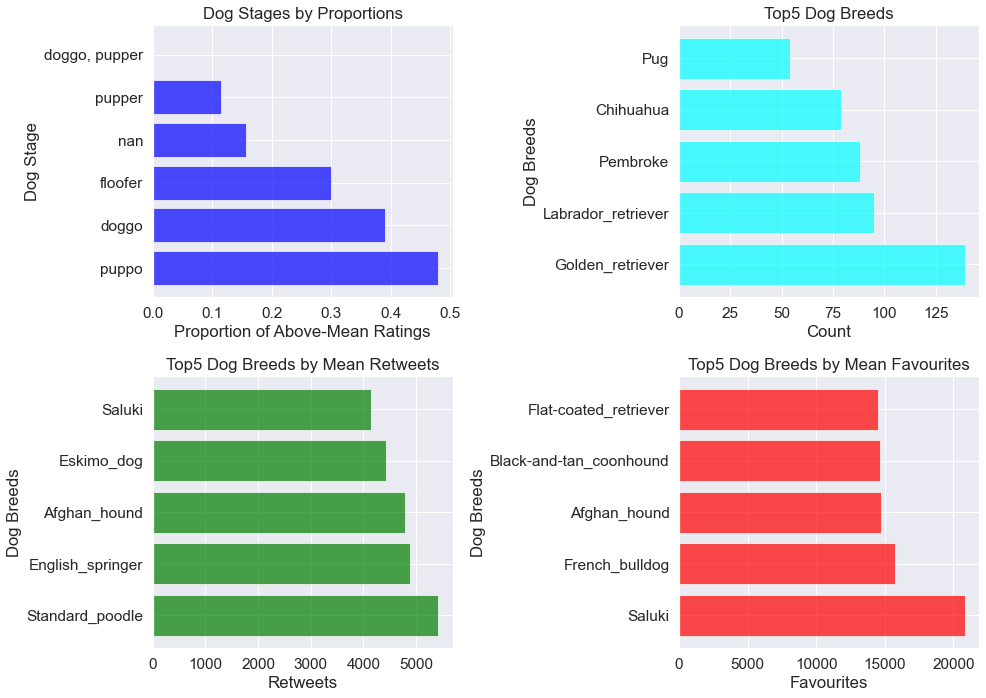

In [115]:
# plot the graphs for the counts of dog stage, top5 breeds, top5 breeds by retweets and top5 breeds by favourites 
# using subplots
plt.rcParams["figure.figsize"] = [14,10]

# first graph
plt.subplot(2,2,1)
plot_bar(#y_label = ['puppo', 'doggo', 'floofer','NaN', 'pupper', 'doggo, pupper'],
         y_label = proportions['dog_stage'],
         xaxis = proportions['prop_high_rating'],
         title = 'Dog Stages by Proportions',
         ylabel = 'Dog Stage',
         xlabel = 'Proportion of Above-Mean Ratings', color='blue');

# second graph
plt.subplot(2,2,2)
plot_bar(#y_label = ['Golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'Pug'],
         y_label = top5_breeds['dog_breeds'],
         xaxis = top5_breeds['breed_count'],
         title = 'Top5 Dog Breeds',
         ylabel = 'Dog Breeds',
         xlabel = 'Count', color='cyan');

# third graph
plt.subplot(2,2,4)
plot_bar(#y_label = ['Saluki', 'French_bulldog', 'Afghan_hound', 'Black-and-tan_coonhound', 'Flat-coated_retriever'],
         y_label = top5_breeds_favourite['dog_breeds'],
         xaxis = top5_breeds_favourite['favorite_count'],
         title = 'Top5 Dog Breeds by Mean Favourites',
         ylabel = 'Dog Breeds',
         xlabel = 'Favourites', color='red');


# fourth graph
plt.subplot(2,2,3)
plot_bar(#y_label = ['Standard_poodle', 'English_springer', 'Afghan_hound', 'Eskimo_dog', 'Saluki'],
         y_label = top5_breeds_retweet['dog_breeds'],
         xaxis = top5_breeds_retweet['retweet_count'],
         title = 'Top5 Dog Breeds by Mean Retweets',
         ylabel = 'Dog Breeds',
         xlabel = 'Retweets', color='green');


plt.tight_layout() 
plt.show()

> This second graph is a line chart for the progression of interactions on WeRateDogs from November 2015 to August 2017.

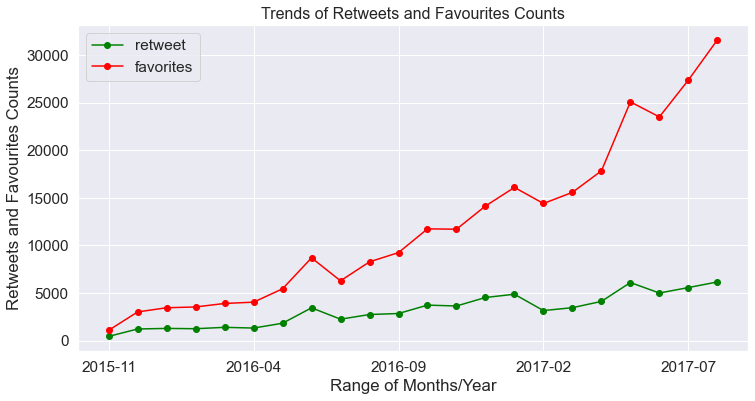

In [116]:
# create a line chart
fig, ax = plt.subplots(figsize=(12,6))

x_label= ['','2015-11', '2016-04', '2016-09', '2017-02', '2017-07'] 

ax.plot(time_df['retweet_count'], label='retweet', marker='o', color='green')
ax.plot(time_df['favorite_count'], label='favorites', marker='o', color='red')

ax.set_xticklabels(x_label)
ax.set_xlabel('Range of Months/Year')
ax.set_ylabel('Retweets and Favourites Counts')
ax.set_title('Trends of Retweets and Favourites Counts', fontsize=16)
ax.legend()

plt.show()

> Finally, I created a heatmap to show the correlation between reactions and ratings. The lighter colors indicate a positive correlation.

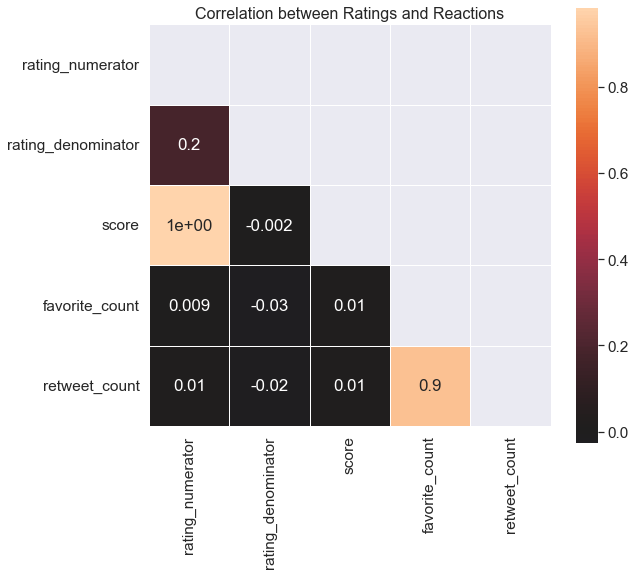

In [117]:
fig = plt.figure(figsize=(9, 8))

# create a mask for the upper triangle because we do not want the correlation values to be repeated
mask = np.triu(np.ones_like(corr, dtype=bool))

fig= sns.heatmap(corr, mask=mask, center=0, annot=True, fmt= "0.1", square=True, linewidths=.5)
plt.title('Correlation between Ratings and Reactions', fontsize=16)

plt.show()

In [3]:
# Use this command if you are running this file in local
!jupyter nbconvert Analysis_of_WeRateDogs_Tweet-Report.ipynb --to html --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Analysis_of_WeRateDogs_Tweet-Report.ipynb to html
[NbConvertApp] Writing 814076 bytes to Analysis_of_WeRateDogs_Tweet-Report.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Hassanat Awodipe\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Hassanat Awodipe\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Hassanat Awodipe\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Hassanat Awodipe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Hassanat Awodipe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, i